In [653]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

sns.set()

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import metrics
import warnings 

In [587]:
df = pd.read_csv("kayak_data.csv", nrows= 1900)

In [588]:
df.head()

,Unnamed: 0,Airline,stops_list,Departure,Prices,Duration
0,0,Emirates,1 stop,LGWGatwick-BLRBengaluru Intl,£687,13h 45m
1,1,Lufthansa,1 stop,BLRBengaluru Intl-LGWGatwick,£629,NaN
2,2,Multiple Airlines,1 stop,LHRHeathrow-BLRBengaluru Intl,£538,NaN
3,3,Lufthansa,1 stop,BLRBengaluru Intl-LHRHeathrow,£629,NaN
4,4,Lufthansa,3 stops,STNStansted-BLRBengaluru Intl,£629,NaN


In [589]:
df

,Unnamed: 0,Airline,stops_list,Departure,Prices,Duration
0,0,Emirates,1 stop,LGWGatwick-BLRBengaluru Intl,£687,13h 45m
1,1,Lufthansa,1 stop,BLRBengaluru Intl-LGWGatwick,£629,NaN
2,2,Multiple Airlines,1 stop,LHRHeathrow-BLRBengaluru Intl,£538,NaN
3,3,Lufthansa,1 stop,BLRBengaluru Intl-LHRHeathrow,£629,NaN
4,4,Lufthansa,3 stops,STNStansted-BLRBengaluru Intl,£629,NaN
...,...,...,...,...,...,...
1895,25,NaN,1 stop,BLRBengaluru Intl-LHRHeathrow,NaN,13h 55m
1896,26,NaN,1 stop,LHRHeathrow-BLRBengaluru Intl,NaN,12h 05m
1897,27,NaN,1 stop,BLRBengaluru Intl-LHRHeathrow,NaN,13h 55m
1898,28,NaN,1 stop,LHRHeathrow-BLRBengaluru Intl,NaN,12h 05m


In [590]:
df['Source'] = df['Departure'].str.split('-').str.get(0).rename({0: 'Source'})

In [591]:
df['Destination'] = df['Departure'].str.split('-').str.get(1).rename({1: 'Destination'})

In [592]:
df.head()

,Unnamed: 0,Airline,stops_list,Departure,Prices,Duration,Source,Destination
0,0,Emirates,1 stop,LGWGatwick-BLRBengaluru Intl,£687,13h 45m,NaN,BLRBengaluru Intl
1,1,Lufthansa,1 stop,BLRBengaluru Intl-LGWGatwick,£629,NaN,BLRBengaluru Intl,NaN
2,2,Multiple Airlines,1 stop,LHRHeathrow-BLRBengaluru Intl,£538,NaN,LHRHeathrow,BLRBengaluru Intl
3,3,Lufthansa,1 stop,BLRBengaluru Intl-LHRHeathrow,£629,NaN,BLRBengaluru Intl,LHRHeathrow
4,4,Lufthansa,3 stops,STNStansted-BLRBengaluru Intl,£629,NaN,STNStansted,BLRBengaluru Intl


In [593]:
df['stops_list'] = df['stops_list'].str.replace('stop', ' ')
# df['stops_list'] = df['stops_list'].str.replace('stops', ' ')

In [594]:
df['stops_list'] = df['stops_list'].str.replace('s', ' ')

In [595]:
df['stops_list']

0        1  
1        1  
2        1  
3        1  
4       3   
        ... 
1895     1  
1896     1  
1897     1  
1898     1  
1899     1  
Name: stops_list, Length: 1900, dtype: object

In [596]:
df['stops_list']= pd.to_numeric(df['stops_list'], errors='coerce')

In [597]:
df.count()

Unnamed: 0     1900
Airline         952
stops_list     1900
Departure      1900
Prices          952
Duration       1867
Source         1899
Destination    1899
dtype: int64

In [598]:
df.isna().sum().sum()

1931

In [599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1900 non-null   int64 
 1   Airline      952 non-null    object
 2   stops_list   1900 non-null   int64 
 3   Departure    1900 non-null   object
 4   Prices       952 non-null    object
 5   Duration     1867 non-null   object
 6   Source       1899 non-null   object
 7   Destination  1899 non-null   object
dtypes: int64(2), object(6)
memory usage: 118.9+ KB


In [600]:
len(df)

1900

In [601]:
df.describe()

,Unnamed: 0,stops_list
count,1900.000000,1900.000000
mean,16.468421,1.117895
std,9.799278,0.471176
min,0.000000,1.000000
25%,8.000000,1.000000
50%,16.000000,1.000000
75%,25.000000,1.000000
max,33.000000,3.000000


In [602]:
df.columns

Index(['Unnamed: 0', 'Airline', 'stops_list', 'Departure', 'Prices',
       'Duration', 'Source', 'Destination'],
      dtype='object')

In [603]:
df.shape

(1900, 8)

In [604]:
df = df.drop(['Unnamed: 0'], axis=1)

In [605]:
df['Duration']

0       13h 45m
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1895    13h 55m
1896    12h 05m
1897    13h 55m
1898    12h 05m
1899    14h 05m
Name: Duration, Length: 1900, dtype: object

In [606]:
df['Prices'] = df['Prices'].str.replace('£','',regex=True)
df['Prices'] = df['Prices'].str.replace(',','',regex=True)
df['Prices'] = df['Prices'].str.replace('SAR','',regex=True)
df['Prices'] = df['Prices'].str.strip()
df['Prices'] = round(pd.to_numeric(df['Prices'])/3.75,2)

In [607]:
duration_hours = []
duration_mins = []
df['Duration'] = df['Duration'].str.replace('h','',regex=True)
df['Duration'] = df['Duration'].str.replace('m','',regex=True)
# for i in range(df['Duration']) :
#     duration_hours.append(df['Duration'][i].split(sep = "h")[0])
#     duration_mins.append(df['Duration'][i].split(sep = "m")[0].split()[-1])
# d = []
# for i in range(len(df['Duration'])):
#     d.append(duration_hours[i]*60+duration_mins[i])

In [608]:
df['Duration_hour'] = df['Duration'].str.split(' ', expand=True).get(0)

In [609]:
df['Duration_hour']

0        13
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1895     13
1896     12
1897     13
1898     12
1899     14
Name: Duration_hour, Length: 1900, dtype: object

In [610]:
df['Duration_min'] = df['Duration'].str.split(' ', expand=True).get(1)

In [611]:
df['Duration_min']

0        45
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1895     55
1896     05
1897     55
1898     05
1899     05
Name: Duration_min, Length: 1900, dtype: object

In [612]:
df['Duration_min'].head()

0     45
1    NaN
2    NaN
3    NaN
4    NaN
Name: Duration_min, dtype: object

In [613]:
df['Duration']= pd.to_numeric(df['Duration'], errors='coerce')

In [614]:
df['Duration'].dtype

dtype('float64')

In [615]:
df['Duration_min']= pd.to_numeric(df['Duration_min'], errors='coerce')

In [616]:
df['Duration_hour']= pd.to_numeric(df['Duration_hour'], errors='coerce')

In [617]:
# mean_duration_min = df['Duration_min'].mean()
df['Duration_min'].fillna(int(df['Duration_min'].mean()), inplace=True)

In [618]:
df['Duration_min']

0       45.0
1       27.0
2       27.0
3       27.0
4       27.0
        ... 
1895    55.0
1896     5.0
1897    55.0
1898     5.0
1899     5.0
Name: Duration_min, Length: 1900, dtype: float64

In [619]:
# mean_duration_min = df['Duration_min'].mean()
df['Duration_hour'].fillna(int(df['Duration_hour'].mean()), inplace=True)

In [115]:
# df['Duration_hour']
# seconds = 0
# seconds = seconds*(24*3600)
# hour = seconds // 3600

In [620]:
df['Duration_hour'] = df['Duration_hour']*60

In [621]:
df['Duration_hour']

0       780.0
1       780.0
2       780.0
3       780.0
4       780.0
        ...  
1895    780.0
1896    720.0
1897    780.0
1898    720.0
1899    840.0
Name: Duration_hour, Length: 1900, dtype: float64

In [622]:
df['Duration'] = df['Duration_hour'] + df['Duration_min']

In [623]:
df['Duration']

0       825.0
1       807.0
2       807.0
3       807.0
4       807.0
        ...  
1895    835.0
1896    725.0
1897    835.0
1898    725.0
1899    845.0
Name: Duration, Length: 1900, dtype: float64

In [624]:
df = df.drop(['Duration_hour'], axis=1)

In [625]:
df = df.drop(['Duration_min'], axis=1)

In [626]:
df

,Airline,stops_list,Departure,Prices,Duration,Source,Destination
0,Emirates,1,LGWGatwick-BLRBengaluru Intl,183.20,825.0,NaN,BLRBengaluru Intl
1,Lufthansa,1,BLRBengaluru Intl-LGWGatwick,167.73,807.0,BLRBengaluru Intl,NaN
2,Multiple Airlines,1,LHRHeathrow-BLRBengaluru Intl,143.47,807.0,LHRHeathrow,BLRBengaluru Intl
3,Lufthansa,1,BLRBengaluru Intl-LHRHeathrow,167.73,807.0,BLRBengaluru Intl,LHRHeathrow
4,Lufthansa,3,STNStansted-BLRBengaluru Intl,167.73,807.0,STNStansted,BLRBengaluru Intl
...,...,...,...,...,...,...,...
1895,NaN,1,BLRBengaluru Intl-LHRHeathrow,NaN,835.0,BLRBengaluru Intl,LHRHeathrow
1896,NaN,1,LHRHeathrow-BLRBengaluru Intl,NaN,725.0,LHRHeathrow,BLRBengaluru Intl
1897,NaN,1,BLRBengaluru Intl-LHRHeathrow,NaN,835.0,BLRBengaluru Intl,LHRHeathrow
1898,NaN,1,LHRHeathrow-BLRBengaluru Intl,NaN,725.0,LHRHeathrow,BLRBengaluru Intl


In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Airline      952 non-null    object 
 1   stops_list   1900 non-null   int64  
 2   Departure    1900 non-null   object 
 3   Prices       952 non-null    float64
 4   Duration     1900 non-null   float64
 5   Source       1899 non-null   object 
 6   Destination  1899 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 104.0+ KB


In [628]:
df['Airline'].isnull().sum()

948

In [629]:
df

,Airline,stops_list,Departure,Prices,Duration,Source,Destination
0,Emirates,1,LGWGatwick-BLRBengaluru Intl,183.20,825.0,NaN,BLRBengaluru Intl
1,Lufthansa,1,BLRBengaluru Intl-LGWGatwick,167.73,807.0,BLRBengaluru Intl,NaN
2,Multiple Airlines,1,LHRHeathrow-BLRBengaluru Intl,143.47,807.0,LHRHeathrow,BLRBengaluru Intl
3,Lufthansa,1,BLRBengaluru Intl-LHRHeathrow,167.73,807.0,BLRBengaluru Intl,LHRHeathrow
4,Lufthansa,3,STNStansted-BLRBengaluru Intl,167.73,807.0,STNStansted,BLRBengaluru Intl
...,...,...,...,...,...,...,...
1895,NaN,1,BLRBengaluru Intl-LHRHeathrow,NaN,835.0,BLRBengaluru Intl,LHRHeathrow
1896,NaN,1,LHRHeathrow-BLRBengaluru Intl,NaN,725.0,LHRHeathrow,BLRBengaluru Intl
1897,NaN,1,BLRBengaluru Intl-LHRHeathrow,NaN,835.0,BLRBengaluru Intl,LHRHeathrow
1898,NaN,1,LHRHeathrow-BLRBengaluru Intl,NaN,725.0,LHRHeathrow,BLRBengaluru Intl


In [630]:

# get price quantile to deal with outliers
# def get_price_quantile(price):
Q1 = df['Prices'].quantile(0.25)
Q3 = df['Prices'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
# get_price_quantile = (lower_lim, upper_lim)
# return (lower_lim,upper_lim)

In [631]:
quantile = upper_lim, lower_lim

In [632]:
upper_lim

178.8

In [633]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Airline      952 non-null    object 
 1   stops_list   1900 non-null   int64  
 2   Departure    1900 non-null   object 
 3   Prices       952 non-null    float64
 4   Duration     1900 non-null   float64
 5   Source       1899 non-null   object 
 6   Destination  1899 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 104.0+ KB


In [634]:
df['Prices']= pd.to_numeric(df['Prices'], errors='coerce')

In [635]:
df['Prices']= df['Prices'].fillna(float(df['Prices'].mean()))

In [636]:
df['Prices'].fillna(float(df['Prices'].mean()))
print(df['Prices'])

0       183.200000
1       167.730000
2       143.470000
3       167.730000
4       167.730000
           ...    
1895    169.050525
1896    169.050525
1897    169.050525
1898    169.050525
1899    169.050525
Name: Prices, Length: 1900, dtype: float64


In [637]:

df['Prices'].mean()

169.05052521008196

In [638]:
df['Prices']

0       183.200000
1       167.730000
2       143.470000
3       167.730000
4       167.730000
           ...    
1895    169.050525
1896    169.050525
1897    169.050525
1898    169.050525
1899    169.050525
Name: Prices, Length: 1900, dtype: float64

In [639]:
df.isnull().sum()

Airline        948
stops_list       0
Departure        0
Prices           0
Duration         0
Source           1
Destination      1
dtype: int64

In [558]:
# the Airline column will be replaced by the average price per airline.
# df.drop("Airline", axis = 1, inplace = True)

In [640]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Airline      952 non-null    object 
 1   stops_list   1900 non-null   int64  
 2   Departure    1900 non-null   object 
 3   Prices       1900 non-null   float64
 4   Duration     1900 non-null   float64
 5   Source       1899 non-null   object 
 6   Destination  1899 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 104.0+ KB


In [641]:
# source
df["Source"].value_counts()

BLRBengaluru Intl    950
LHRHeathrow          787
STNStansted          137
LCYLondon City        25
Name: Source, dtype: int64

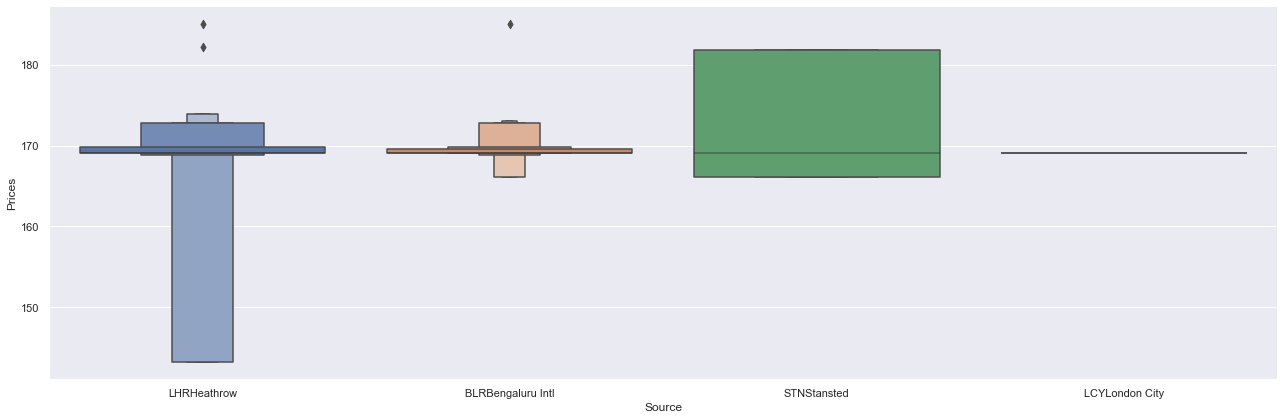

In [642]:
# source vs price
sns.catplot(y = "Prices", x= "Source", data = df.sort_values("Prices", ascending = False), kind="boxen", height = 6, aspect = 3)

In [643]:
# performing OneHotEncoding on Source since it's nominal categorical data  
source =df[["Source"]]
source =pd.get_dummies(source, drop_first=True)
source.head()

,Source_LCYLondon City,Source_LHRHeathrow,Source_STNStansted
0,0,0,0
1,0,0,0
2,0,1,0
3,0,0,0
4,0,0,1


In [644]:
# destination
df["Destination"].value_counts()

BLRBengaluru Intl    950
LHRHeathrow          444
LGWGatwick           423
STNStansted           82
Name: Destination, dtype: int64

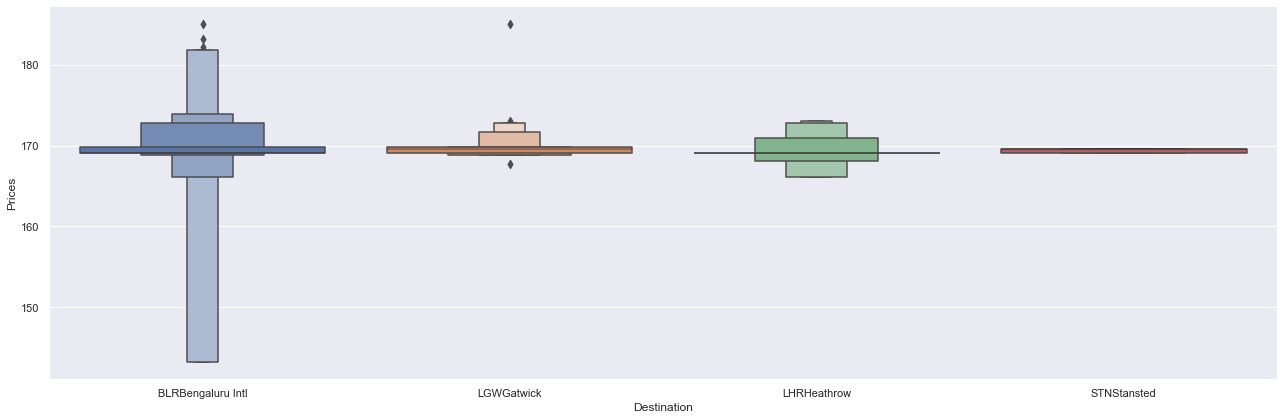

In [645]:
# destination vs price
sns.catplot(y = "Prices", x= "Destination", data = df.sort_values("Prices", ascending = False), kind="boxen", height = 6, aspect = 3)

In [646]:
# performing OneHotEncoding on Destination since it's nominal categorical data
destination = df[["Destination"]]
destination = pd.get_dummies(destination, drop_first=True)
destination.head()

,Destination_LGWGatwick,Destination_LHRHeathrow,Destination_STNStansted
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


In [647]:
# total stops
print(df["stops_list"].value_counts())
df["stops_list"].unique()

1    1788
3     112
Name: stops_list, dtype: int64


array([1, 3])

In [648]:
# performing LabelEncoder on Total stops since it's ordinal categorical data
df.replace({ "1 stop ": 1,  "3 stops ":3}, inplace=True)

In [649]:
final_df = pd.concat([df,source,destination], axis=1).reset_index(drop = True)

In [650]:
final_df

,Airline,stops_list,Departure,Prices,Duration,Source,Destination,Source_LCYLondon City,Source_LHRHeathrow,Source_STNStansted,Destination_LGWGatwick,Destination_LHRHeathrow,Destination_STNStansted
0,Emirates,1,LGWGatwick-BLRBengaluru Intl,183.200000,825.0,NaN,BLRBengaluru Intl,0,0,0,0,0,0
1,Lufthansa,1,BLRBengaluru Intl-LGWGatwick,167.730000,807.0,BLRBengaluru Intl,NaN,0,0,0,0,0,0
2,Multiple Airlines,1,LHRHeathrow-BLRBengaluru Intl,143.470000,807.0,LHRHeathrow,BLRBengaluru Intl,0,1,0,0,0,0
3,Lufthansa,1,BLRBengaluru Intl-LHRHeathrow,167.730000,807.0,BLRBengaluru Intl,LHRHeathrow,0,0,0,0,1,0
4,Lufthansa,3,STNStansted-BLRBengaluru Intl,167.730000,807.0,STNStansted,BLRBengaluru Intl,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,NaN,1,BLRBengaluru Intl-LHRHeathrow,169.050525,835.0,BLRBengaluru Intl,LHRHeathrow,0,0,0,0,1,0
1896,NaN,1,LHRHeathrow-BLRBengaluru Intl,169.050525,725.0,LHRHeathrow,BLRBengaluru Intl,0,1,0,0,0,0
1897,NaN,1,BLRBengaluru Intl-LHRHeathrow,169.050525,835.0,BLRBengaluru Intl,LHRHeathrow,0,0,0,0,1,0
1898,NaN,1,LHRHeathrow-BLRBengaluru Intl,169.050525,725.0,LHRHeathrow,BLRBengaluru Intl,0,1,0,0,0,0


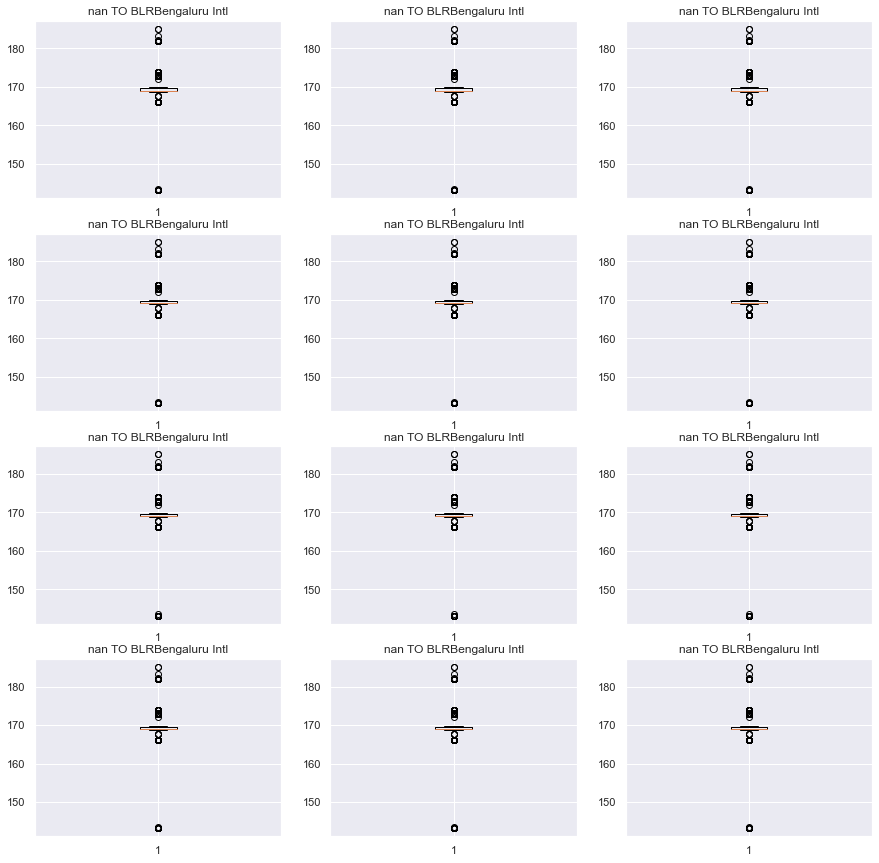

In [651]:
# boxplots for each route
k=0
figure, axis = plt.subplots(4, 3, figsize=(15,15))
for i in range(4):
    for j in range(3):
        axis[i,j].boxplot(df['Prices'])
        axis[i,j].set_title(f"{df['Source'][0]} TO {df['Destination'][0]}")
        k += 1

In [ ]:
avg_airline_price_1 = df['Airline']
avg_airline_price_1 = df['Prices']
new_df = pd.DataFrame()

for avg in avg_airline_price_1:
    first_3 = np.mean(df[df.Airline == avg].reset_index().head(3).Prices)
    last_3 =  np.mean(df[df.Airline == avg].reset_index().tail(3).Prices)
    new_df = new_df.append(
        pd.DataFrame([[avg, last_3 - first_3]], columns = ['Airline', 'PriceDiff']))

In [691]:
new_df.Airline.dtypes

dtype('float64')

In [692]:
avg_price = new_df.Airline

In [694]:
len(df['Airline'])

1900

In [695]:
len(avg_price)

1900

In [676]:
new_df

0    183.200000
0    167.730000
0    143.470000
0    167.730000
0    167.730000
        ...    
0    169.050525
0    169.050525
0    169.050525
0    169.050525
0    169.050525
Name: Airline, Length: 1900, dtype: float64

In [705]:
# drop date since it'll not be used as a feature
final_df.drop(["Source","Destination"], axis=1, inplace=True)

In [706]:
final_df.shape

(1900, 11)

In [707]:
final_df.isnull().sum()

Airline                    948
stops_list                   0
Departure                    0
Prices                       0
Duration                     0
Source_LCYLondon City        0
Source_LHRHeathrow           0
Source_STNStansted           0
Destination_LGWGatwick       0
Destination_LHRHeathrow      0
Destination_STNStansted      0
dtype: int64

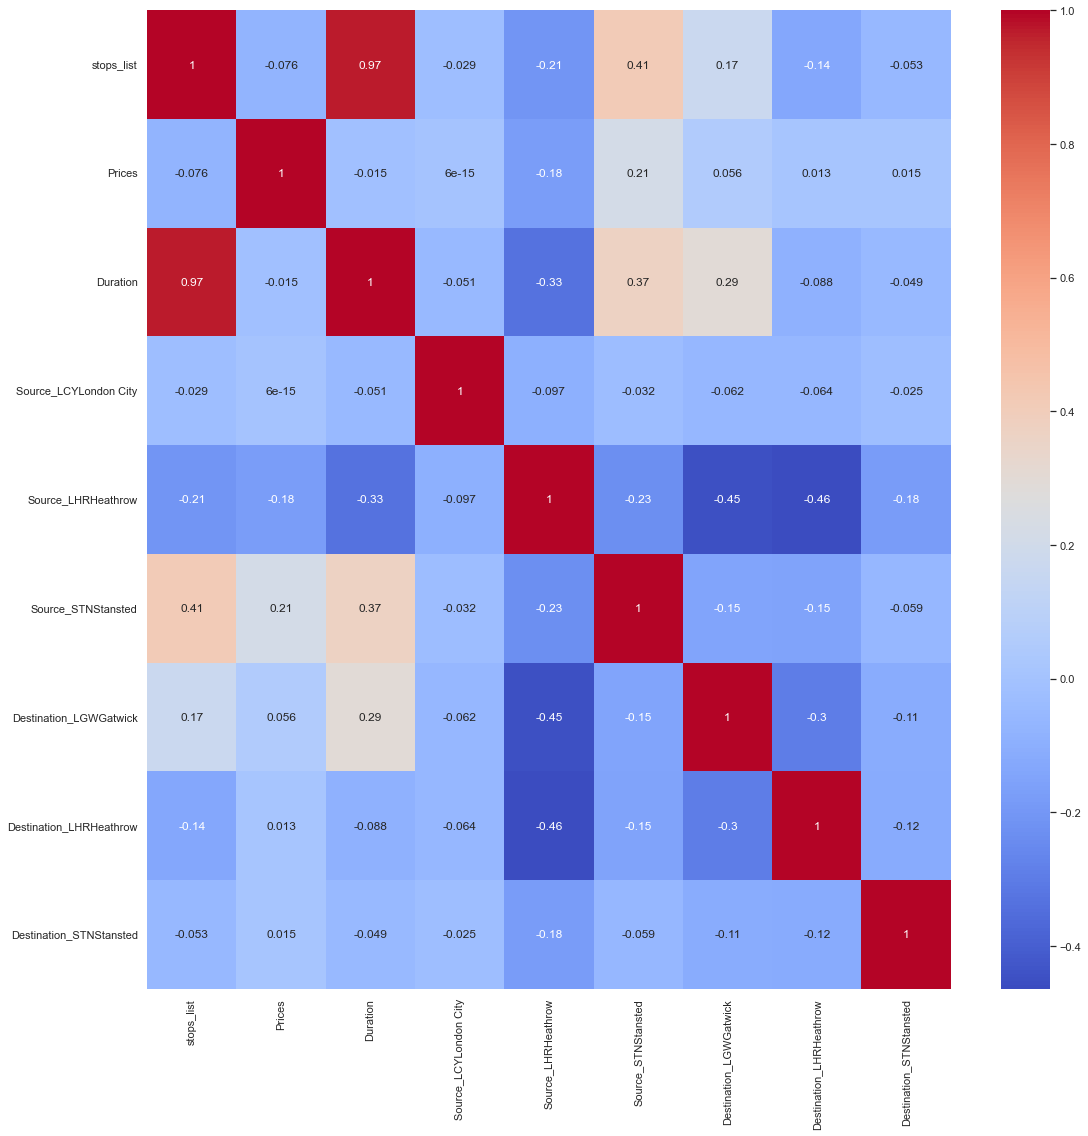

In [709]:
plt.figure(figsize = (18,18))

sns.heatmap(final_df.corr(),annot= True, cmap = "coolwarm")

plt.show()

In [710]:
df.head()

IndexError: index 0 is out of bounds for axis 0 with size 0

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
X = final_df[['Duration', 'stops_list', 'Average Price', 'Source_PAR',
       'Source_RUH', 'Source_SVO', 'Destination_PAR', 'Destination_RUH',
       'Destination_SVO']]

y = final_df["Price"]

In [ ]:
# getting feature importance to the target variable "Price".
selection =ExtraTreesRegressor()
selection.fit(X,y)
selection.feature_importances_